C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 35ms/step - accuracy: 0.8460 - loss: 0.5015 - val_accuracy: 0.9810 - val_loss: 0.0609
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.9806 - loss: 0.0605 - val_accuracy: 0.9803 - val_loss: 0.0651
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9882 - loss: 0.0365 - val_accuracy: 0.9834 - val_loss: 0.0513
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9892 - loss: 0.0321 - val_accuracy: 0.9866 - val_loss: 0.0412
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.9923 - loss: 0.0238 - val_accuracy: 0.9899 - val_loss: 0.0359
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9892 - loss: 0.0339
Test accuracy: 0.9914000034332275


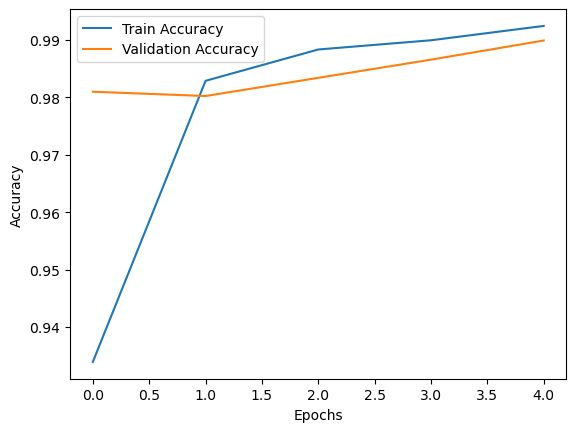

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 데이터 정규화 (0 ~ 255 값을 0 ~ 1 사이로 변환)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# 라벨을 원-핫 인코딩
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# 모델 정의
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense 레이어 추가
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# 테스트 데이터로 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# VGG16의 가중치 학습을 True로 변경
vgg_base.trainable = True

# 전이 학습 모델 정의
model = models.Sequential()

# VGG16 모델 추가
model.add(vgg_base)

# CNN에 적합한 Fully Connected Layer 추가
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # 10개의 클래스 (0~9)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')